# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [8]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
sinasc_raw.loc[sinasc_raw['munResLat']<=-10.5,'MunLat']=' latitude menor -10.5'
sinasc_raw.loc[sinasc_raw['munResLat']>=-10.5,'MunLat']=' latitude maior -10.5'

sinasc_raw.pivot_table(index='MunLat',
                       values=['PESO', 'QTDFILVIVO'],
                       aggfunc ={'PESO': [('soma', np.sum),
                                          ('media', np.mean),
                                          ('minimo', np.min),
                                          ('maximo',np.max),
                                          ('mediana',np.median),
                                          ('desvio padrao',np.std),
                                          ('variancia',np.var)],
                                 'QTDFILVIVO':[('soma', np.sum),
                                          ('media', np.mean),
                                          ('minimo', np.min),
                                          ('maximo',np.max),
                                          ('mediana',np.median),
                                          ('desvio padrao',np.std),
                                          ('variancia',np.var)]}
                      ) 

PESO                                      \
                      desvio padrao  maximo        media mediana minimo   
MunLat                                                                    
 latitude maior -10.5    556.487709  5190.0  3246.055864  3275.0  295.0   
 latitude menor -10.5    531.815114  5985.0  3240.098053  3270.0  258.0   

                                                    QTDFILVIVO         \
                             soma      variancia desvio padrao maximo   
MunLat                                                                  
 latitude maior -10.5  45555148.0  309678.570242      1.198613   12.0   
 latitude menor -10.5  42098594.0  282827.315354      1.138300   30.0   

                                                                   
                          media mediana minimo     soma variancia  
MunLat                                                             
 latitude maior -10.5  1.129317     1.0    0.0  14226.0  1.436674  
 latitude menor -10.5  0.980011     1.0    0.0  12600.0  1.295727

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
sinasc_raw.loc[sinasc_raw['munResArea']<=3000,'MunArea']= 'area menor 3.000'
sinasc_raw.loc[sinasc_raw['munResArea']>=3000,'MunArea']= 'area maior 3.000'

sinasc_raw.pivot_table(index='MunArea',
                       values=['PESO', 'QTDFILVIVO'],
                       aggfunc ={'PESO': [('soma', np.sum),
                                          ('media', np.mean),
                                          ('minimo', np.min),
                                          ('maximo',np.max),
                                          ('mediana',np.median),
                                          ('desvio padrao',np.std),
                                          ('variancia',np.var)],
                                 'QTDFILVIVO':[('soma', np.sum),
                                          ('media', np.mean),
                                          ('minimo', np.min),
                                          ('maximo',np.max),
                                          ('mediana',np.median),
                                          ('desvio padrao',np.std),
                                          ('variancia',np.var)]}
                      ) 

PESO                                      \
                 desvio padrao  maximo        media mediana minimo   
MunArea                                                              
area maior 3.000    547.716582  5985.0  3249.134538  3280.0  292.0   
area menor 3.000    531.583103  5720.0  3218.359073  3245.0  258.0   

                                               QTDFILVIVO                   \
                        soma      variancia desvio padrao maximo     media   
MunArea                                                                      
area maior 3.000  70857126.0  299993.453720      1.191750   14.0  1.086890   
area menor 3.000  16796616.0  282580.595074      1.075442   30.0  0.924284   

                                                    
                 mediana minimo     soma variancia  
MunArea                                             
area maior 3.000     1.0    0.0  22053.0  1.420268  
area menor 3.000     1.0    0.0   4773.0  1.156575

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [12]:
sinasc_raw.loc[sinasc_raw['munResAlt']<=150,'MunAlt']= 'MunAlt menor 150'
sinasc_raw.loc[sinasc_raw['munResAlt']>=150,'MunAlt']= 'MunAlt maior 150'

sinasc_raw.pivot_table(index='MunAlt',
                       values=['PESO', 'QTDFILVIVO'],
                       aggfunc ={'PESO': [('soma', np.sum),
                                          ('media', np.mean),
                                          ('minimo', np.min),
                                          ('maximo',np.max),
                                          ('mediana',np.median),
                                          ('desvio padrao',np.std),
                                          ('variancia',np.var)],
                                 'QTDFILVIVO':[('soma', np.sum),
                                          ('media', np.mean),
                                          ('minimo', np.min),
                                          ('maximo',np.max),
                                          ('mediana',np.median),
                                          ('desvio padrao',np.std),
                                          ('variancia',np.var)]}
                      ) 

PESO                                                 \
                 desvio padrao  maximo       media mediana minimo        soma   
MunAlt                                                                          
MunAlt maior 150    528.304534  5985.0  3239.31068  3265.0  258.0  46710860.0   
MunAlt menor 150    562.989410  5135.0  3247.63084  3280.0  295.0  40942882.0   

                                   QTDFILVIVO                                  \
                      variancia desvio padrao maximo     media mediana minimo   
MunAlt                                                                          
MunAlt maior 150  279105.680432      1.071692   30.0  0.957874     1.0    0.0   
MunAlt menor 150  316957.075831      1.272781   14.0  1.172266     1.0    0.0   

                                     
                     soma variancia  
MunAlt                               
MunAlt maior 150  13461.0  1.148524  
MunAlt menor 150  13365.0  1.619971

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

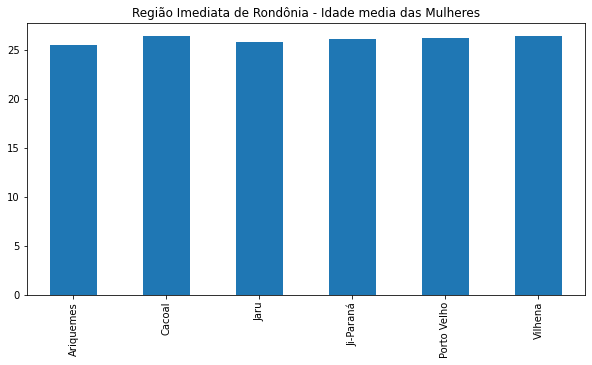

In [67]:
sinasc_raw_1 = sinasc_raw[['IDADEMAE','munResNome']]
sinasc_raw_1.set_index('munResNome',inplace=True)

imediatas = {
    "Candeias do Jamari":"Porto Velho" ,
    "Guajará-Mirim": "Porto Velho" ,
    "Itapuã do Oeste": "Porto Velho" ,
    "Nova Mamoré": "Porto Velho" ,
    "Porto Velho": "Porto Velho",        
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim":"Ariquemes",
    "Monte Negro":"Ariquemes",
    "Rio Crespo":"Ariquemes",
    "Governador Jorge Teixeira":"Jaru",
    "Jaru":"Jaru",
    "Machadinho d'Oeste":"Jaru",
    "Theobroma":"Jaru",
    "Vale do Anari":"Jaru",      
    "Alvorada d'Oeste":"Ji-Paraná",
    "Costa Marques":"Ji-Paraná",
    "Ji-Paraná":"Ji-Paraná",
    "Mirante da Serra":"Ji-Paraná",
    "Nova União":"Ji-Paraná",
    "Ouro Preto do Oeste":"Ji-Paraná",
    "Presidente Médici":"Ji-Paraná",
    "São Francisco do Guaporé":"Ji-Paraná",
    "São Miguel do Guaporé":"Ji-Paraná",
    "Seringueiras":"Ji-Paraná",
    "Teixeirópolis":"Ji-Paraná",
    "Urupá":"Ji-Paraná",
    "Vale do Paraíso":"Ji-Paraná",
    "Alta Floresta d'Oeste":"Cacoal",
    "Alto Alegre dos Parecis":"Cacoal",
    "Cacoal":"Cacoal",
    "Castanheiras":"Cacoal",
    "Espigão d'Oeste":"Cacoal",
    "Ministro Andreazza":"Cacoal",
    "Nova Brasilândia d'Oeste":"Cacoal",
    "Novo Horizonte do Oeste":"Cacoal",
    "Parecis":"Cacoal",
    "Pimenta Bueno":"Cacoal",
    "Primavera de Rondônia":"Cacoal",
    "Rolim de Moura":"Cacoal",
    "Santa Luzia d'Oeste":"Cacoal",
    "São Felipe d'Oeste":"Cacoal",
    "Cabixi":"Vilhena",
    "Cerejeiras":"Vilhena",
    "Chupinguaia":"Vilhena",
    "Colorado do Oeste":"Vilhena",
    "Corumbiara":"Vilhena",
    "Pimenteiras do Oeste":"Vilhena",
    "Vilhena":"Vilhena"    
}


sinasc_raw_1.groupby(imediatas).mean().plot.bar(
    title='Região Imediata de Rondônia - Idade media das Mulheres',
    figsize=(10,5),
    legend=False
)

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


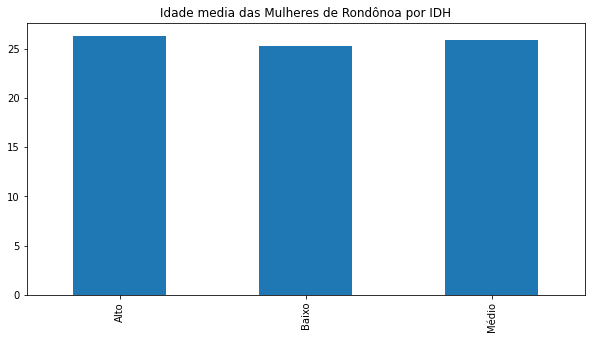

In [75]:
 "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim":"Ariquemes",
    "Monte Negro":"Ariquemes",
    "Rio Crespo":"Ariquemes",


idh = {    
    "Porto Velho":"Alto",
    "Vilhena":"Alto",
    "Cacoal":"Alto",
    "Ji-Paraná":"Alto",
    "Pimenta Bueno":"Alto",
    "Ariquemes":"Alto",
    "Rolim de Moura":"Alto",
    "Cerejeiras":"Médio",
    "Jaru":"Médio",
    "Colorado do Oeste":"Médio",
    "Ouro Preto do Oeste":"Médio",
    "Espigão d'Oeste":"Médio",
    "Santa Luzia d'Oeste":"Médio",
    "Pimenteiras do Oeste":"Médio",
    "Presidente Médici":"Médio",
    "Castanheiras":"Médio",
    "Guajará-Mirim":"Médio",
    "Chupinguaia":"Médio",
    "Cabixi":"Médio",
    "Candeias do Jamari":"Médio",
    "São Felipe d'Oeste":"Médio",
    "Cacaulândia":"Médio",
    "São Miguel do Guaporé":"Médio",
    "Mirante da Serra":"Médio",
    "Alvorada d'Oeste":"Médio",
    "Teixeirópolis":"Médio",
    "Nova Brasilândia d'Oeste":"Médio",
    "Rio Crespo":"Médio",
    "Primavera de Rondônia":"Médio",
    "Alta Floresta d'Oeste":"Médio",
    "Ministro Andreazza":"Médio",
    "Novo Horizonte do Oeste":"Médio",
    "Vale do Paraíso":"Médio",
    "Alto Paraíso":"Médio",
    "Parecis":"Médio",
    "Buritis":"Médio",
    "Itapuã do Oeste":"Médio",
    "Corumbiara":"Médio",
    "Cujubim":"Médio",
    "Costa Marques":"Médio",
    "São Francisco do Guaporé":"Médio",
    "Urupá":"Médio",
    "Monte Negro":"Médio",
    "Seringueiras":"Baixo",
    "Governador Jorge Teixeira":"Baixo",
    "Machadinho d'Oeste":"Baixo",
    "Campo Novo de Rondônia":"Baixo",
    "Alto Alegre dos Parecis":"Baixo",
    "Theobroma":"Baixo",
    "Nova União":"Baixo",
    "Nova Mamoré":"Baixo",
    "Vale do Anari":"Baixo"
}


sinasc_raw_1.groupby(idh).mean().plot.bar(
    title='Idade media das Mulheres de Rondônoa por IDH',
    figsize=(10,5),
    legend=False
)

plt.show()

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


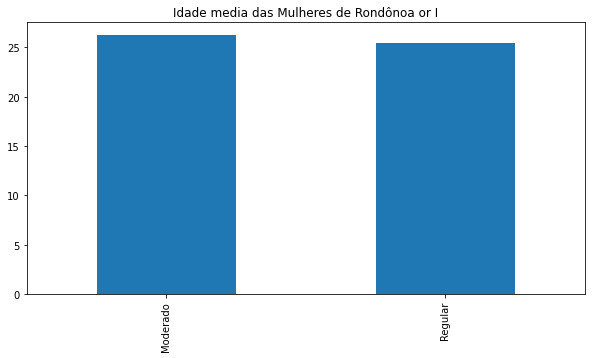

In [74]:
ifdm = {    
    "Ariquemes":"Moderado",
    "Vilhena":"Moderado",
    "Pimenta Bueno":"Moderado",
    "Porto Velho":"Moderado",
    "Ji-Paraná":"Moderado",
    "Cacoal":"Moderado",
    "Santa Luzia d'Oeste":"Moderado",
    "Rolim de Moura":"Moderado",
    "Chupinguaia":"Moderado",
    "São Miguel do Guaporé":"Moderado",
    "Pimenteiras do Oeste":"Moderado",
    "Teixeirópolis":"Moderado",
    "Colorado do Oeste":"Moderado",
    "Jaru":"Moderado",
    "Rio Crespo":"Moderado",
    "Primavera de Rondônia":"Moderado",
    "Alta Floresta d'Oeste":"Moderado",
    "Ouro Preto do Oeste":"Moderado",
    "São Francisco do Guaporé":"Moderado",
    "Candeias do Jamari":"Moderado",
    "Buritis":"Moderado",
    "São Felipe d'Oeste":"Moderado",
    "Presidente Médici":"Moderado",
    "Cerejeiras":"Moderado",
    "Monte Negro":"Moderado",
    "Urupá":"Moderado",
    "Espigão d'Oeste":"Regular",
    "Seringueiras":"Regular",
    "Alvorada d'Oeste":"Regular",
    "Itapuã do Oeste":"Regular",
    "Cabixi":"Regular",
    "Novo Horizonte do Oeste":"Regular",
    "Nova Brasilândia d'Oeste":"Regular",
    "Vale do Paraíso":"Regular",
    "Corumbiara":"Regular",
    "Alto Paraíso":"Regular",
    "Cacaulândia":"Regular",
    "Vale do Anari":"Regular",
    "Ministro Andreazza":"Regular",
    "Costa Marques":"Regular",
    "Nova União":"Regular",
    "Guajará-Mirim":"Regular",
    "Mirante da Serra":"Regular",
    "Parecis":"Regular",
    "Castanheiras":"Regular",
    "Theobroma":"Regular",
    "Machadinho d'Oeste":"Regular",
    "Campo Novo de Rondônia":"Regular",
    "Nova Mamoré":"Regular",
    "Cujubim":"Regular",
    "Alto Alegre dos Parecis":"Regular",
    "Governador Jorge Teixeira":"Regular"
}


sinasc_raw_1.groupby(ifdm).mean().plot.bar(
    title='Idade media das Mulheres de Rondônoa por IFDM',
    figsize=(10,5),
    legend=False
)

plt.show()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


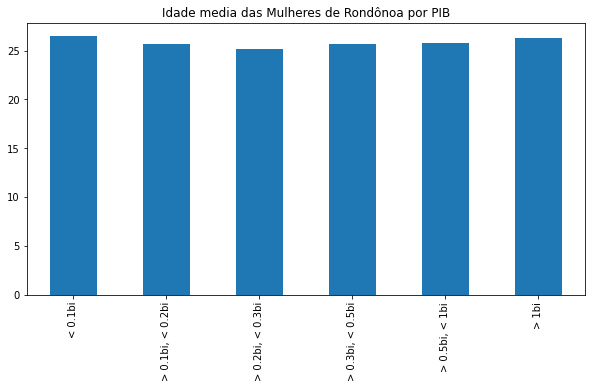

In [80]:
pib = {    
    "Alta Floresta do Oeste":"> 0.3bi, < 0.5bi",
    "Alto Alegre dos Parecis":"> 0.2bi, < 0.3bi",
    "Alto Paraíso":"> 0.3bi, < 0.5bi",
    "Alvorada do Oeste":"> 0.2bi, < 0.3bi",
    "Ariquemes":"> 1bi",
    "Buritis":"> 0.5bi, < 1bi",
    "Cabixi":"> 0.1bi, < 0.2bi",
    "Cacaulândia":"> 0.1bi, < 0.2bi",
    "Cacoal":"> 1bi",
    "Campo Novo de Rondônia":"> 0.2bi, < 0.3bi",
    "Candeias do Jamari":"> 0.5bi, < 1bi",
    "Castanheiras":"< 0.1bi",
    "Cerejeiras":"> 0.5bi, < 1bi",
    "Chupinguaia":"> 0.1bi, < 0.2bi",
    "Colorado do Oeste":"> 0.3bi, < 0.5bi",
    "Corumbiara":"> 0.1bi, < 0.2bi",
    "Costa Marques":"> 0.1bi, < 0.2bi",
    "Cujubim":"> 0.3bi, < 0.5bi",
    "Espigão d'Oeste":"> 0.5bi, < 1bi",
    "Governador Jorge Teixeira":"> 0.1bi, < 0.2bi",
    "Guajará-Mirim":"> 0.5bi, < 1bi",
    "Itapuã do Oeste":"> 0.1bi, < 0.2bi",
    "Jaru":"> 1bi",
    "Ji-Paraná":"> 1bi",
    "Machadinho do Oeste":"> 0.5bi, < 1bi",
    "Ministro Andreazza":"> 0.1bi, < 0.2bi",
    "Mirante da Serra":"> 0.1bi, < 0.2bi",
    "Monte Negro":"> 0.2bi, < 0.3bi",
    "Nova Brasilândia do Oeste":"> 0.3bi, < 0.5bi",
    "Nova Mamoré":"> 0.5bi, < 1bi",
    "Nova União":"< 0.1bi",
    "Novo Horizonte do Oeste":"> 0.1bi, < 0.2bi",
    "Ouro Preto do Oeste":"> 0.5bi, < 1bi",
    "Parecis":"< 0.1bi",
    "Pimenta Bueno":"> 1bi",
    "Pimenteiras do Oeste":"< 0.1bi",
    "Porto Velho":"> 1bi",
    "Presidente Médici":"> 0.3bi, < 0.5bi",
    "Primavera de Rondônia":"< 0.1bi",
    "Rio Crespo":"< 0.1bi",
    "Rolim de Moura":"> 1bi",
    "Santa Luzia do Oeste":"> 0.1bi, < 0.2bi",
    "São Felipe do Oeste":"< 0.1bi",
    "São Francisco do Guaporé":"> 0.3bi, < 0.5bi",
    "São Miguel do Guaporé":"> 0.5bi, < 1bi",
    "Seringueiras":"> 0.1bi, < 0.2bi",
    "Teixeirópolis":"< 0.1bi",
    "Theobroma":"> 0.1bi, < 0.2bi",
    "Urupá":"> 0.1bi, < 0.2bi",
    "Vale do Anari":"> 0.1bi, < 0.2bi",
    "Vale do Paraíso":"> 0.1bi, < 0.2bi",
    "Vilhena":"> 1bi"
}

sinasc_raw_1.groupby(pib).mean().plot.bar(
    title='Idade media das Mulheres de Rondônoa por PIB',
    figsize=(10,5),
    legend=False
)

plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Descobri que a idade média das mulheres que deram a luz em Rondônia é menor onde há piores indices de IDH, IFDM e PIB.